In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
train_pd = pd.read_csv('../train.csv')
test_pd = pd.read_csv('../test.csv')

train_idx = train_pd['PassengerId']
test_idx = test_pd['PassengerId']

combined_pd = pd.concat([train_pd, test_pd]).reset_index(drop=True)

display(combined_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [68]:
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [69]:
combined_pd=combined_pd.dropna(subset=['Fare','Embarked'])
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId       0
Survived        417
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1013
Embarked          0
dtype: int64


In [70]:
print(combined_pd['Name'].unique())

names = combined_pd['Name']

last_names = []
titles = []
first_names = []

for name in names:
    if ',' not in name:
        last_names.append('')
    else:
        last, name = name.split(', ', 1)
        last_names.append(last)

    if '.' not in name:
        titles.append('')
    else:
        title, first = name.split('. ', 1)
        titles.append(title)
        first_names.append(first)

last_names = np.array(last_names)
titles = np.array(titles)
first_names = np.array(first_names)

idx = np.where(np.isin(titles,['Capt', 'Col', 'Major']))
titles[idx] = 'Military'

idx = np.where(np.isin(titles,['Don', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Master', 'the Countess']))
titles[idx] = 'Nobility'

idx = np.where(np.isin(titles,['Ms', 'Mlle', 'Miss']))
titles[idx] = 'Ms'

idx = np.where(np.isin(titles,['Mrs', 'Mme']))
titles[idx] = 'Mrs'

print('\n')
print(np.unique(titles, return_counts= True))

combined_pd['Title'] = titles

combined_pd

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' ... 'Saether, Mr. Simon Sivertsen'
 'Ware, Mr. Frederick' 'Peter, Master. Michael J']


(array(['Dr', 'Military', 'Mr', 'Mrs', 'Ms', 'Nobility', 'Rev'],
      dtype='<U12'), array([  8,   7, 756, 197, 263,  67,   8]))


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [71]:
ticket_dict = dict(combined_pd['Ticket'].value_counts())

print(ticket_dict)

combined_pd['tkt_count'] = combined_pd['Ticket'].map(ticket_dict)

display(combined_pd)

{'CA. 2343': 11, '1601': 8, 'CA 2144': 8, '347082': 7, '347077': 7, '3101295': 7, 'PC 17608': 7, 'S.O.C. 14879': 7, '382652': 6, '113781': 6, '347088': 6, '19950': 6, '113503': 5, '16966': 5, '4133': 5, 'PC 17757': 5, '349909': 5, '220845': 5, 'W./C. 6608': 5, 'PC 17755': 4, 'SC/Paris 2123': 4, '2666': 4, '12749': 4, '36928': 4, 'PC 17760': 4, '17421': 4, 'C.A. 2315': 4, '24160': 4, 'LINE': 4, 'C.A. 34651': 4, '230136': 4, '113760': 4, 'W./C. 6607': 4, 'PC 17483': 4, 'C.A. 33112': 4, '363291': 3, 'PC 17582': 3, '29103': 3, '19877': 3, '13502': 3, 'SOTON/O.Q. 3101315': 3, '239853': 3, '110413': 3, '248738': 3, '29106': 3, '110152': 3, '2650': 3, 'A/4 48871': 3, '315153': 3, 'A/5. 851': 3, '230080': 3, '2678': 3, 'PC 17761': 3, 'S.C./PARIS 2079': 3, '35273': 3, '2668': 3, 'PC 17756': 3, '248727': 3, 'PC 17558': 3, 'C.A. 31921': 3, '371110': 3, '19928': 3, '26360': 3, '370129': 3, 'C 4001': 3, 'C.A. 2673': 3, '367226': 3, '345773': 3, 'C.A. 31029': 3, '33638': 3, '2653': 3, 'C.A. 37671': 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility,3
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1


In [72]:
combined_pd['Fare_per_Ticket'] = combined_pd['Fare']/combined_pd['tkt_count']

bins = [-1, 20, 40, 60, 80, 150]
combined_pd['Fare_Bin'] = pd.cut(combined_pd['Fare_per_Ticket'], bins)

display(combined_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count,Fare_per_Ticket,Fare_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]"
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.641650,"(20, 40]"
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1,7.925000,"(-1, 20]"
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.550000,"(20, 40]"
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility,3,36.300000,"(20, 40]"
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]"
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]"


In [73]:
combined_pd.loc[combined_pd.isnull()['Fare_Bin']] # special cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count,Fare_per_Ticket,Fare_Bin


In [74]:
combined_pd['Num_family'] = combined_pd['SibSp'] + combined_pd['Parch'] + 1
display(combined_pd)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,tkt_count,Fare_per_Ticket,Fare_Bin,Num_family
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,35.641650,"(20, 40]",2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms,1,7.925000,"(-1, 20]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,26.550000,"(20, 40]",2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Nobility,3,36.300000,"(20, 40]",1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,1,7.250000,"(-1, 20]",1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr,1,8.050000,"(-1, 20]",1


In [75]:
combined_pd.drop(['Name', 'Ticket', 'Fare', 'tkt_count', 'Fare_per_Ticket','Survived','Cabin'], axis=1, inplace=True)
display(combined_pd)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family
0,1,3,male,22.0,1,0,S,Mr,"(-1, 20]",2
1,2,1,female,38.0,1,0,C,Mrs,"(20, 40]",2
2,3,3,female,26.0,0,0,S,Ms,"(-1, 20]",1
3,4,1,female,35.0,1,0,S,Mrs,"(20, 40]",2
4,5,3,male,35.0,0,0,S,Mr,"(-1, 20]",1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,male,NaN,0,0,S,Mr,"(-1, 20]",1
1305,1306,1,female,39.0,0,0,C,Nobility,"(20, 40]",1
1306,1307,3,male,38.5,0,0,S,Mr,"(-1, 20]",1
1307,1308,3,male,NaN,0,0,S,Mr,"(-1, 20]",1


In [76]:
print('NULL VALUES')
print(combined_pd.isnull().sum())

NULL VALUES
PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Embarked         0
Title            0
Fare_Bin         0
Num_family       0
dtype: int64


In [77]:
missing_age_df = combined_pd.loc[combined_pd.isnull()['Age']]
remain_df = combined_pd.loc[combined_pd.notnull()['Age']]
(remain_df.shape,missing_age_df.shape)

((1043, 10), (263, 10))

In [78]:
from sklearn.preprocessing import LabelEncoder

label_enc = remain_df.copy()
label_enc = label_enc.astype(str)

label_enc = label_enc.apply(LabelEncoder().fit_transform)

label_enc = label_enc.drop(columns=['PassengerId']).astype('float')

display(label_enc)

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_Bin,Num_family
0,2.0,1.0,25.0,1.0,0.0,2.0,2.0,0.0,2.0
1,0.0,0.0,51.0,1.0,0.0,0.0,3.0,1.0,2.0
2,2.0,0.0,32.0,0.0,0.0,2.0,4.0,0.0,0.0
3,0.0,0.0,47.0,1.0,0.0,2.0,3.0,1.0,2.0
4,2.0,1.0,47.0,0.0,0.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1300,2.0,0.0,38.0,1.0,1.0,2.0,4.0,0.0,3.0
1302,0.0,0.0,50.0,1.0,0.0,1.0,3.0,1.0,2.0
1303,2.0,0.0,35.0,0.0,0.0,2.0,4.0,0.0,0.0
1305,0.0,0.0,53.0,0.0,0.0,0.0,5.0,1.0,0.0


In [79]:
from sklearn.model_selection import train_test_split

X = label_enc.drop('Age', axis=1)  # 特征
y = label_enc['Age']  # 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [80]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # 假设输入特征的维度为 n
# n_features = X.shape[1]  # 以10个特征为例，根据你的数据集实际情况调整

# # 构建模型
# model = models.Sequential([
#     # 输入层
#     layers.Input(shape=(n_features,)),
#     # 第一层全连接层，使用ReLU激活函数
#     layers.Dense(256, activation='relu'),
#     # 可以添加一个 Dropout 层来减少过拟合
#     layers.Dropout(0.2),
#     layers.Dense(128, activation='relu'),
#     # 再添加一个 Dropout 层
#     layers.Dropout(0.2),
#     # 第二层全连接层，使用ReLU激活函数
#     layers.Dense(64, activation='relu'),
#     # 再添加一个 Dropout 层
#     layers.Dropout(0.2),
#     # 第三层全连接层，使用ReLU激活函数
#     layers.Dense(32, activation='relu'),
#     # 输出层，预测年龄，使用线性激活函数
#     layers.Dense(1, activation='linear')
# ])

# # 编译模型
# model.compile(optimizer='adam',
#               loss='mean_squared_error',  # 因为是回归问题，所以使用均方误差作为损失函数
#               metrics=['mae'])  # 使用平均绝对误差作为性能指标

# # 打印模型结构
# model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 256)               2304      
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 32)               

Epoch 1/200


106/106 [==============================] - 0s 1ms/step - loss: 909.4689 - mae: 23.6351 - val_loss: 429.1716 - val_mae: 16.8693
Epoch 2/200
106/106 [==============================] - 0s 624us/step - loss: 470.9606 - mae: 16.9943 - val_loss: 414.9947 - val_mae: 16.1999
Epoch 3/200
106/106 [==============================] - 0s 603us/step - loss: 469.7560 - mae: 16.9986 - val_loss: 414.2599 - val_mae: 16.4738
Epoch 4/200
106/106 [==============================] - 0s 605us/step - loss: 453.3122 - mae: 16.6459 - val_loss: 457.7263 - val_mae: 16.3166
Epoch 5/200
106/106 [==============================] - 0s 594us/step - loss: 448.8918 - mae: 16.6134 - val_loss: 409.1000 - val_mae: 16.0313
Epoch 6/200
106/106 [==============================] - 0s 605us/step - loss: 428.4315 - mae: 16.1535 - val_loss: 410.0544 - val_mae: 16.3022
Epoch 7/200
106/106 [==============================] - 0s 594us/step - loss: 444.3979 - mae: 16.4513 - val_loss: 400.6380 - val_mae: 15.5169
Epoch 8/200
106/106 [======

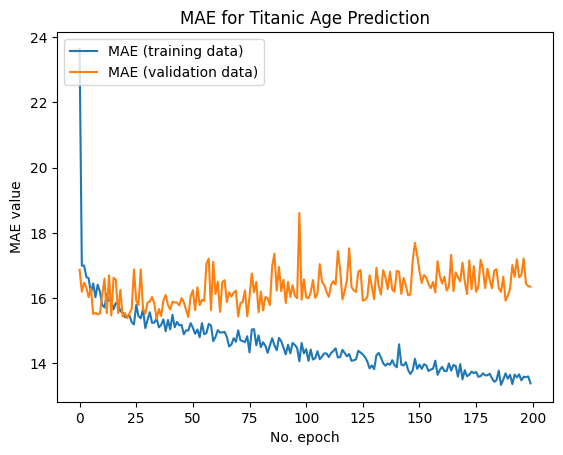

In [81]:
# 分割数据集为训练集和测试集的代码这里省略
# 假定 X_train, y_train, X_test, y_test 已经准备好

# 模型训练
history = model.fit(
    X_train, y_train,
    epochs=200,  # 训练100个周期
    batch_size=8,  # 每批次32个样本
    validation_split=0.1,  # 从训练数据中划分20%作为验证数据
    verbose=1  # 在训练过程中打印详细信息
)

# 评估模型
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test loss: {test_loss}, Test MAE: {test_mae}")

# 可视化训练过程
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE (training data)')
plt.plot(history.history['val_mae'], label='MAE (validation data)')
plt.title('MAE for Titanic Age Prediction')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()
